# Interactive gaussian anamorphosis modeling with hermite polynomials

In this test we compare the results from RGeostat


In [1]:
#general imports
import pygslib    
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#make the plots inline
#matplotlib notebook 
%matplotlib inline 

In [2]:
#get the data in gslib format into a pandas Dataframe
clusterdata= pygslib.gslib.read_gslib_file('../data/cluster.dat') 
clusterdata.head()

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619
1,5.5,1.5,0.06,0.27,1.619
2,38.5,5.5,0.08,0.40,1.416
3,20.5,1.5,0.09,0.39,1.821
4,27.5,14.5,0.09,0.24,1.349


## Interactive anamorphosis modeling

('Raw Variance', 22.08676848118367)
('Variance from PCI', 20.35059930508229)
('zamin', 0.21096965147100422)
('zamax', 50.01666229781394)
('yamin', -0.967633525284082)
('yamax', 2.9453773810449038)
('zpmin', 0.06004880303574711)
('zpmax', 58.209448542250705)
('ypmin', -2.1114367132879397)
('ypmax', 2.9453773810449038)


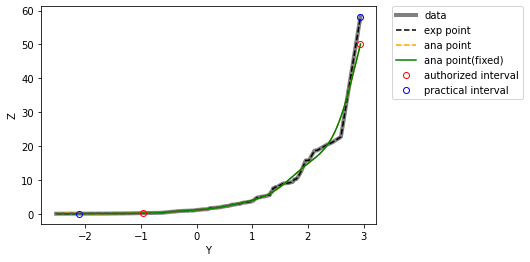

In [3]:
# Fit anamorphosis by changing, zmax, zmin, and extrapolation function
PCI, H, raw, zana, gauss, z, P, \
raw_var, PCI_var, fig1, \
zamin, zamax, yamin, yamax, \
zpmin, zpmax, ypmin, ypmax = pygslib.nonlinear.anamor(
                         z = clusterdata['Primary'], 
                         w = clusterdata['Declustering Weight'], 
                         zmin = None, 
                         zmax = None,
                         zpmin = None, 
                         zpmax = None,
                         ymin= None, 
                         ymax=None,
                         ndisc = 5000,
                         ltail=1, utail=4, ltpar=1, utpar=1.5, K=39)

In [4]:
PCI

array([ 2.52812133, -3.16715117,  2.62856091, -1.58607408,  0.61402391,
        0.06515102, -0.36432446,  0.30916284, -0.0787643 , -0.11881991,
        0.17886538, -0.09547426, -0.06390344,  0.15863711, -0.07932489,
       -0.09483481,  0.15103383, -0.01445782, -0.13576615,  0.10179446,
        0.06412297, -0.1353339 ,  0.02159456,  0.1148837 , -0.08782592,
       -0.0589713 ,  0.1174303 , -0.00804383, -0.10896485,  0.06506076,
        0.07185594, -0.0988453 , -0.02059144,  0.10495847, -0.03023138,
       -0.08630194,  0.06921178,  0.05052895, -0.08971688, -0.00727823])

In [5]:
# get results from rgeostat
PCI_RG = pd.read_csv('hpoly_fromrgeostat.csv').values.ravel()

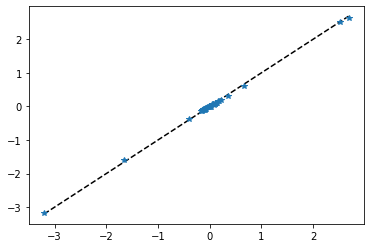

In [6]:
xmin = min(PCI_RG.min(), PCI.min())
xmax = max(PCI_RG.max(), PCI.max())
plt.plot([xmin,xmax],[xmin,xmax], '--k')
plt.plot(PCI_RG, PCI, '*')

In [7]:
pd.DataFrame ({'RGEOSTAT PCI': PCI_RG, 'PyGSLIB PCI': PCI})

,RGEOSTAT PCI,PyGSLIB PCI
0,2.528118,2.528121
1,-3.202085,-3.167151
2,2.687893,2.628561
3,-1.655044,-1.586074
4,0.660749,0.614024
5,0.066977,0.065151
6,-0.408501,-0.364324
7,0.355077,0.309163
8,-0.084329,-0.078764
9,-0.156509,-0.118820
